In [26]:
import cv2
from matplotlib import pyplot as plt


# Usando dlib

Dlib é un framework en C++ para IA que inclue ferramentas para a detección e identificación de caras

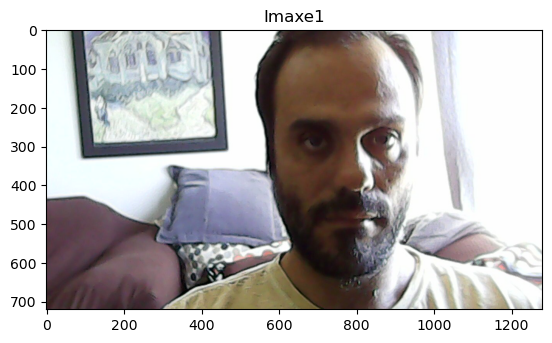

In [27]:
image = cv2.imread("imaxes/isaac.jpg")
imaxe_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(imaxe_color)
plt.title('Imaxe1')
plt.show()


Para traballar co detector de caras é preciso descargar:
- Un sistema para predecir a forma e posición da cara: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
- Unha RNA para identificar a a cara: http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2


In [28]:
import dlib
import numpy as np

predictor_path ="./shape_predictor_5_face_landmarks.dat"
face_rec_model_path = "./dlib_face_recognition_resnet_model_v1.dat"


detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)


known_face_encodings = []
known_face_names = []




Os pasos para facer unha identificación son:
- Detectar a presenza de caras, chamando a *detector*
    - detector vai devolver un array cos rectángulos onde se detectou algo
- Para cada cara detectada:
    - Predecir a forma: chamdno ao *shape_predictor*, que antes se definiu como *sp*
    - Obter a firma da cara a partires da forma: chamar face_recognition_model_v1, definido como *facerec*

A firma vai ser un vector de valores, que modeliza a cara. Para identificar unha cara haberá que ver se a distancia lineal entre o vector obtido e unha lista de vectores coñecidos previamente. Se esa distancia é inferior a 0.6 entón se pode determinar que é misma persoa.

Para empezar hai que crear unha lista de caras coñecidas, polo que habería que ter unha serie de fotos que é o que se fai no paso seguinte, 
na lista known_face_encodings vai a almacenar o vector que identifica a cara co seu nome.

In [29]:

dets = detector(imaxe_color, 1)
print("Number of faces detected: {}".format(len(dets)))
posicions = dets[0]
display(posicions)
shape = sp(imaxe_color,posicions)

face_descriptor = np.array(facerec.compute_face_descriptor(imaxe_color, shape))
display(face_descriptor)

known_face_encodings.append((face_descriptor,"Isaac"))


Number of faces detected: 1


rectangle(553,143,1016,605)

array([-0.077807  ,  0.07409479,  0.05162163, -0.05450222,  0.02939784,
       -0.03294278,  0.01875032,  0.00618397,  0.22492525, -0.0601262 ,
        0.19281971,  0.05357324, -0.25518924, -0.00512956, -0.07177718,
        0.05327309, -0.1283782 , -0.11429929, -0.10950877, -0.14523934,
        0.09797882,  0.0658092 , -0.02830262,  0.02215845, -0.20326479,
       -0.24817833, -0.11125614, -0.13923837, -0.02307223, -0.17250712,
        0.01511452, -0.01338121, -0.12843117, -0.06544371, -0.02536738,
        0.04192083, -0.01557929, -0.08569644,  0.17852814,  0.06911314,
       -0.06870673,  0.05803074,  0.03074256,  0.39234281,  0.17283762,
       -0.03727114,  0.01024802, -0.02434321,  0.14503482, -0.26739195,
        0.13735263,  0.10871027,  0.10181962,  0.10057096,  0.12661146,
       -0.13386586, -0.02140522,  0.1731289 , -0.23989683,  0.18063572,
        0.03379116, -0.02967941, -0.07915187, -0.02926676,  0.14535937,
        0.1564469 , -0.14219891, -0.14706904,  0.13086466, -0.17

In [30]:
face_names = []

dets = detector(imaxe_color, 1)
tolerancia = 0.6
for d in dets:

    shape = sp(imaxe_color,d)
    face_descriptor = np.array(facerec.compute_face_descriptor(imaxe_color, shape))
    print(np.linalg.norm(face_descriptor - known_face_encodings[0][0]))
    # See if the face is a match for the known face(s)
    matches = [(np.linalg.norm(face_descriptor - match[0]), match[1]) for match in known_face_encodings if np.linalg.norm(face_descriptor - match[0]) <= tolerancia]
    print(matches)
    if len(matches) == 0:
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),"NonSei"))
    else:
        carasOrdenadas = sorted(matches,key=lambda x: x[0]) 
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),carasOrdenadas[0][1]))


0.0
[(0.0, 'Isaac')]


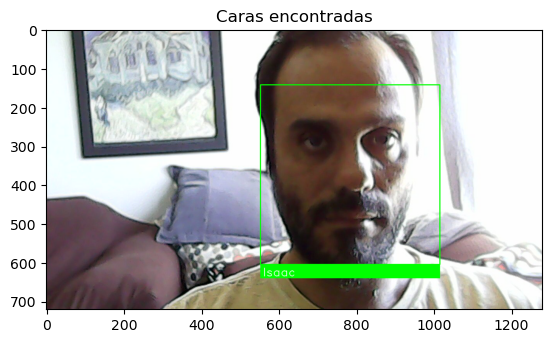

In [31]:
imaxeConMarcas = imaxe_color.copy() 
for (top, right, bottom, left), name in face_names:
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size

    color = (0, 255, 0) if not name=="NonSei" else (0, 0, 255)
    # Draw a box around the face
    cv2.rectangle(imaxeConMarcas, (left, top), (right, bottom), color, 2)

    # Draw a label with a name below the face
    cv2.rectangle(imaxeConMarcas, (left, bottom + 35), (right, bottom), color, cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(imaxeConMarcas, name, (left + 6, bottom + 30), font, 1.0, (255, 255, 255), 1)

plt.imshow(imaxeConMarcas)
plt.title('Caras encontradas')
plt.show()        

Imos a ver como se identifica a quen pertence esa cara.
Primeiro hai que presentar unha foto (ou varias) onde apareza unha persoa e darlle un nome. Imos a probar con Phill



In [32]:
imaxePhill = cv2.imread("imaxes/phill.png")
imaxePhillColor = cv2.cvtColor(imaxePhill, cv2.COLOR_BGR2RGB)

dets = detector(imaxePhill, 1)
print("Number of faces detected: {}".format(len(dets)))
posicions = dets[0]
display(posicions)
shape = sp(imaxePhill,posicions)

face_descriptor = np.array(facerec.compute_face_descriptor(imaxePhill, shape))
display(face_descriptor)

known_face_encodings.append((face_descriptor,"Phill"))



Number of faces detected: 1


rectangle(112,55,156,98)

array([-0.06698755,  0.06619097,  0.05728874, -0.0207773 , -0.10569433,
       -0.0819037 , -0.06285653, -0.03332502,  0.16258584, -0.07919612,
        0.19273882, -0.06312414, -0.18924642, -0.03482875, -0.0930059 ,
        0.06708017, -0.12737525, -0.04270844, -0.14914842, -0.13545236,
       -0.05991498,  0.05272416,  0.10616371, -0.01920866, -0.11359074,
       -0.25535914, -0.07558978, -0.08564734,  0.14806223, -0.1470947 ,
       -0.07473473,  0.13308087, -0.19065043, -0.14526904,  0.08255229,
        0.03826532,  0.02909634, -0.03266894,  0.22185186,  0.06362469,
       -0.09653526,  0.09178372,  0.0501174 ,  0.28650865,  0.17041622,
        0.04871691, -0.01802286, -0.12827542,  0.17373356, -0.27269423,
        0.09111473,  0.14328046,  0.09187585,  0.01964123,  0.15303168,
       -0.22489403,  0.03701939,  0.08601819, -0.1745197 ,  0.11222131,
        0.05579117,  0.03590339, -0.07074478, -0.02012958,  0.12656727,
        0.11373352, -0.08282691, -0.13428181,  0.1288583 , -0.11

e agora collemos a foto onde están todos e se pasa o recoñecedor  de caras

In [33]:
imaxeTodos = cv2.imread("imaxes/todos.png")
imaxeTodosColor = cv2.cvtColor(imaxeTodos, cv2.COLOR_BGR2RGB)

0.9226017996279927
[]
0.7713068628995481
[]
0.8920458799183382
[]
0.9012974944178415
[]
0.9991807746403104
[]
0.8453037118081693
[]
0.9065838568325434
[]
0.8452568707714323
[]
0.800453481875386
[(0.37436795435516795, 'Phill')]
0.8319908116223238
[]
0.9135297715228313
[]
0.8671928423209276
[]


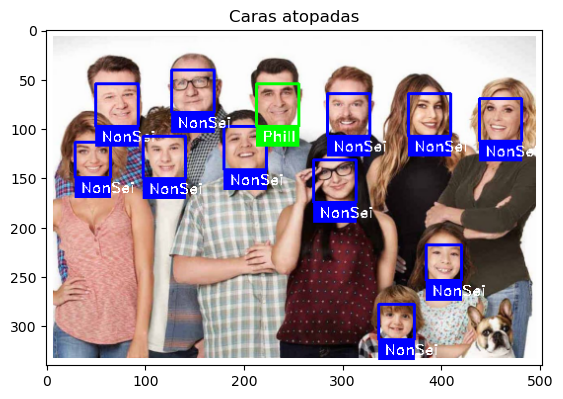

In [34]:
face_names = []

dets = detector(imaxeTodosColor, 1)
tolerancia = 0.6
for d in dets:

    shape = sp(imaxeTodosColor,d)
    face_descriptor = np.array(facerec.compute_face_descriptor(imaxeTodosColor, shape))
    print(np.linalg.norm(face_descriptor - known_face_encodings[0][0]))
    # See if the face is a match for the known face(s)
    matches = [(np.linalg.norm(face_descriptor - match[0]), match[1]) for match in known_face_encodings if np.linalg.norm(face_descriptor - match[0]) <= tolerancia]
    print(matches)
    if len(matches) == 0:
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),"NonSei"))
    else:
        carasOrdenadas = sorted(matches,key=lambda x: x[0]) 
        face_names.append(((d.top(), d.right(), d.bottom(), d.left()),carasOrdenadas[0][1]))
imaxeConMarcas = imaxeTodosColor.copy() 
for (top, right, bottom, left), name in face_names:
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size

    color = (0, 255, 0)
    if name=="NonSei":
        color = (0, 0, 255)
    # Draw a box around the face
    cv2.rectangle(imaxeConMarcas, (left, top), (right, bottom), color, 2)

    # Draw a label with a name below the face
    cv2.rectangle(imaxeConMarcas, (left, bottom + 20), (right, bottom), color, cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(imaxeConMarcas, name, (left + 6, bottom + 15), font, 0.5, (255, 255, 255), 1)

plt.imshow(imaxeConMarcas)
plt.title('Caras atopadas')
plt.show()      